In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import newspaper
from newspaper import Article
import seaborn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import CategoricalNB

import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 20
from matplotlib.figure import Figure

%load_ext autoreload
%autoreload 2

from functionsNB import *

[nltk_data] Downloading package stopwords to /Users/Gabby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Gabby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
OverallCatsCool = { 
        'u.s. news': 'us news', 
        'comedy': 'entertainment', 
        'parenting': 'parenting', 
        'world news': 'world news', 
        'culture & arts': 'culture and arts',
        'tech': 'science tech and finance', 
        'sports': 'sports', 
        'entertainment': 'entertainment', 
        'politics': 'general politics', 
        'weird news': 'weird news',
        'environment': 'environment', 
        'education': 'education', 
        'science': 'science tech and finance', 
        'wellness': 'leisure',
        'food & drink': 'leisure', 
        'media': 'entertainment',
        'home & living': 'leisure', 
        'travel': 'leisure',
        'venezuela': 'world news', 
        'private_finance': 'science tech and finance', 
        'climate': 'environment', 
        'russia': 'world news', 
        'native_americans': 'native americans', 
        'palestine': 'world news', 
        'tech_censorship': 'science tech and finance',
        'church_state': 'religion', 
        'islam': 'religion', 
        'gun': 'crime',
        'nuclear_weapons': 'violence', 
        'yemen': 'world news', 
        'china': 'world news',
        'universities': 'education', 
        'public_finance': 'science tech and finance', 
        'judaism': 'religion', 
        'israel': 'world news', 
        'affirmative_action': 'education',
        'crime': 'crime', 
        'human_rights': 'human rights', 
        'abortion': 'human rights',
        'military_spending': 'military and intelligence', 
        'espionage': 'military and intelligence',
        'religion': 'religion', 
        'latino voices': 'latino voices', 
        'women': 'female voices', 
        'black voices': 'black voices', 
        'queer voices': 'queer voices', 
        'impact': 'impact', 
        'weddings': 'leisure',
        'blm': 'human rights',                             
        'business': 'science tech and finance', 
        'style & beauty': 'leisure', 
        'us_immigration': 'us immigration', 
        'police': 'military and intelligence', 
        'sexual_harassment': 'corporate', 
        'prisons': 'prisons', 
        'oil': 'environment',
        'money': 'science tech and finance', 
        'elections-2020' : 'us news', 
        'sport': 'sports', 
        'immigration': 'us immigration', 
        'environment': 'environment',
        'human rights': 'human rights', 
        'student-debt': 'education', 
        'vaccines': 'science tech and finance', 
        'white-nationalism': 'us news',
        'coronavirus': 'science tech and finance', 
        'trump-presidency': 'us news', 
        'gender': 'human rights',
        'international-politics-and-world-news': 'world news', 
        'gun-control': 'military and intelligence',
        'middle-class': 'science tech and finance'
}

In [ ]:
kagglePhrases, mbicPhrases = cleanup()
    
kagglePhrases['CATEGORY_NAME'] = kagglePhrases['CATEGORY_NAME'].replace(OverallCatsCool.keys(), OverallCatsCool.values())
mbicPhrases['CATEGORY_NAME'] = mbicPhrases['CATEGORY_NAME'].replace(OverallCatsCool.keys(), OverallCatsCool.values())

totalPhraseList = pd.concat([kagglePhrases, mbicPhrases], ignore_index=True)
totalPhraseList['CATEGORY_NAME'].unique()

array(['human rights', 'world news', 'military and intelligence',
       'science tech and finance', 'environment', 'corporate',
       'us immigration', 'native americans', 'religion', 'prisons',
       'crime', 'violence', 'education', 'us news', 'sports'],
      dtype=object)

In [ ]:
temp = pd.read_csv('dataset_test.csv')
test_news = pd.DataFrame()
test_news['text'] = temp['text']
test_news['bias'] = temp['category']
test_news

,text,bias
0,Rep Alexandria OcasioCortez (DNY) slammed bill...,right
1,One of the biggest lies told by many opponents...,left
2,Tuesday on HillTV 2020 Democratic presidential...,right
3,HuffPost is part of Verizon Media We and our p...,left
4,WASHINGTON (Reuters) Gun control activists on...,center
...,...,...
96,HuffPost is part of Verizon Media We and our p...,left
97,WASHINGTON (Reuters) Job and revenue losses p...,center
98,Get breaking news alerts and special reports T...,left
99,When Theresa Ward had her first child 14 years...,left


In [ ]:
labeled_news = pd.DataFrame()
filename = "./texts_and_labels_cleaned.tsv"
labeled_news = pd.read_csv(filename, sep='\t')
labeled_news['label'] = labeled_news['label'].replace(OverallCatsCool.keys(), OverallCatsCool.values())

,Unnamed: 0.1,Unnamed: 0,text,label,bias
0,0,0,associated press make clear platform year pres...,us news,center
1,1,1,increasingly bitter dispute woman national soc...,sports,left
2,2,2,speak country first time oval office night pre...,us immigration,left
3,3,3,professor teach climate change class subject w...,environment,right
4,4,4,left thing take baby hostage perfect example g...,human rights,right


In [ ]:
vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(labeled_news.text)
vectorizer.vocabulary_
counts = pd.DataFrame(matrix.toarray(),
                  columns=vectorizer.vocabulary_)

model_category = CategoricalNB(alpha=1)
model_category.fit(counts, labeled_news['label'])
pred_classes = model_category.predict(counts)
pred_classes
acc_train = model_category.score(counts, labeled_news['label'])
print("\nAccuracy on train data for category prediction = %0.4f " % acc_train)


Accuracy on train data for category prediction = 0.5594 


In [ ]:
model_bias = CategoricalNB(alpha=1)
model_bias.fit(counts, labeled_news['bias'])
pred_classes = model_bias.predict(counts)
pred_classes
acc_train = model_bias.score(counts, labeled_news['bias'])
print("\nAccuracy on train data for bias prediction = %0.4f " % acc_train)


Accuracy on train data for bias prediction = 0.7248 


In [ ]:
cats_in_data = labeled_news['label'].value_counts()
cats_in_data#.keys()

science tech and finance     202
us news                      179
human rights                 158
environment                  101
us immigration                93
military and intelligence     91
sports                        88
education                     56
world news                    42
Name: label, dtype: int64

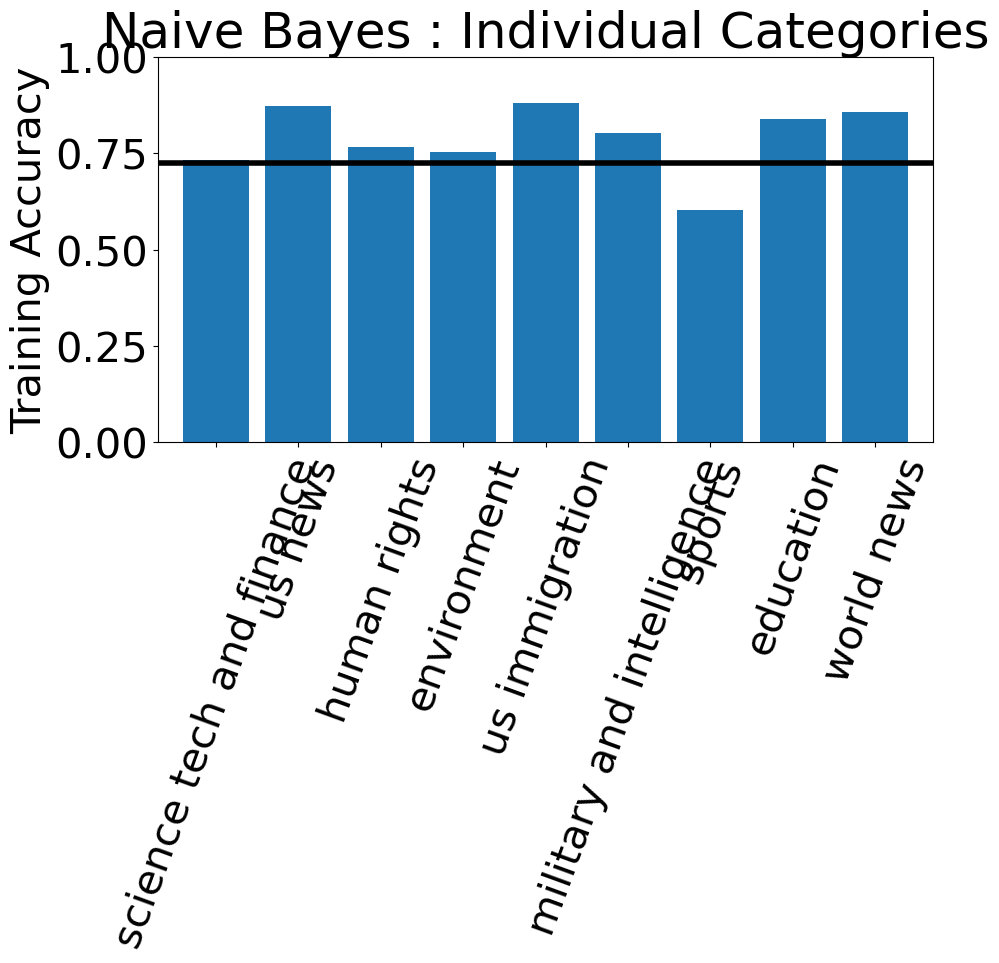

In [ ]:
all_words_catsInOrder = np.array([])
all_words_accs = np.array([])

totalPhraseList['PHRASE'] = totalPhraseList['PHRASE'].str.lower()

for cat in cats_in_data.keys():
    cat_subset = labeled_news.loc[labeled_news['label'] == cat]
    biased_words_subset = totalPhraseList.loc[totalPhraseList['CATEGORY_NAME'] == cat]
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(cat_subset.text)
    vectorizer.vocabulary_
    counts = pd.DataFrame(matrix.toarray(),
                  columns=vectorizer.vocabulary_)
    model_cat = CategoricalNB(alpha=1)
    model_cat.fit(counts, cat_subset['bias'])
    pred_classes = model_cat.predict(counts)
    acc_train = model_cat.score(counts, cat_subset['bias'])
    all_words_catsInOrder = np.append(all_words_catsInOrder, cat)
    all_words_accs = np.append(all_words_accs, acc_train)
    
    
#Uncomment too see individual plot    
#fig, ax = plt.subplots(figsize = (10, 5))
#
#ax.bar(all_words_catsInOrder, all_words_accs)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(70)
#ax.plot([-1, 11], [0.7248, 0.7248], color='black', linewidth=4)
#ax.set_title("Naive Bayes : Individual Categories")
#ax.set_ylabel("Training Accuracy")
#ax.set_ylim(0, 1)
#ax.set_xlim(-.7, 8.7)
#
#plt.savefig("naiveBayesIndividualCategories_allWords.png")

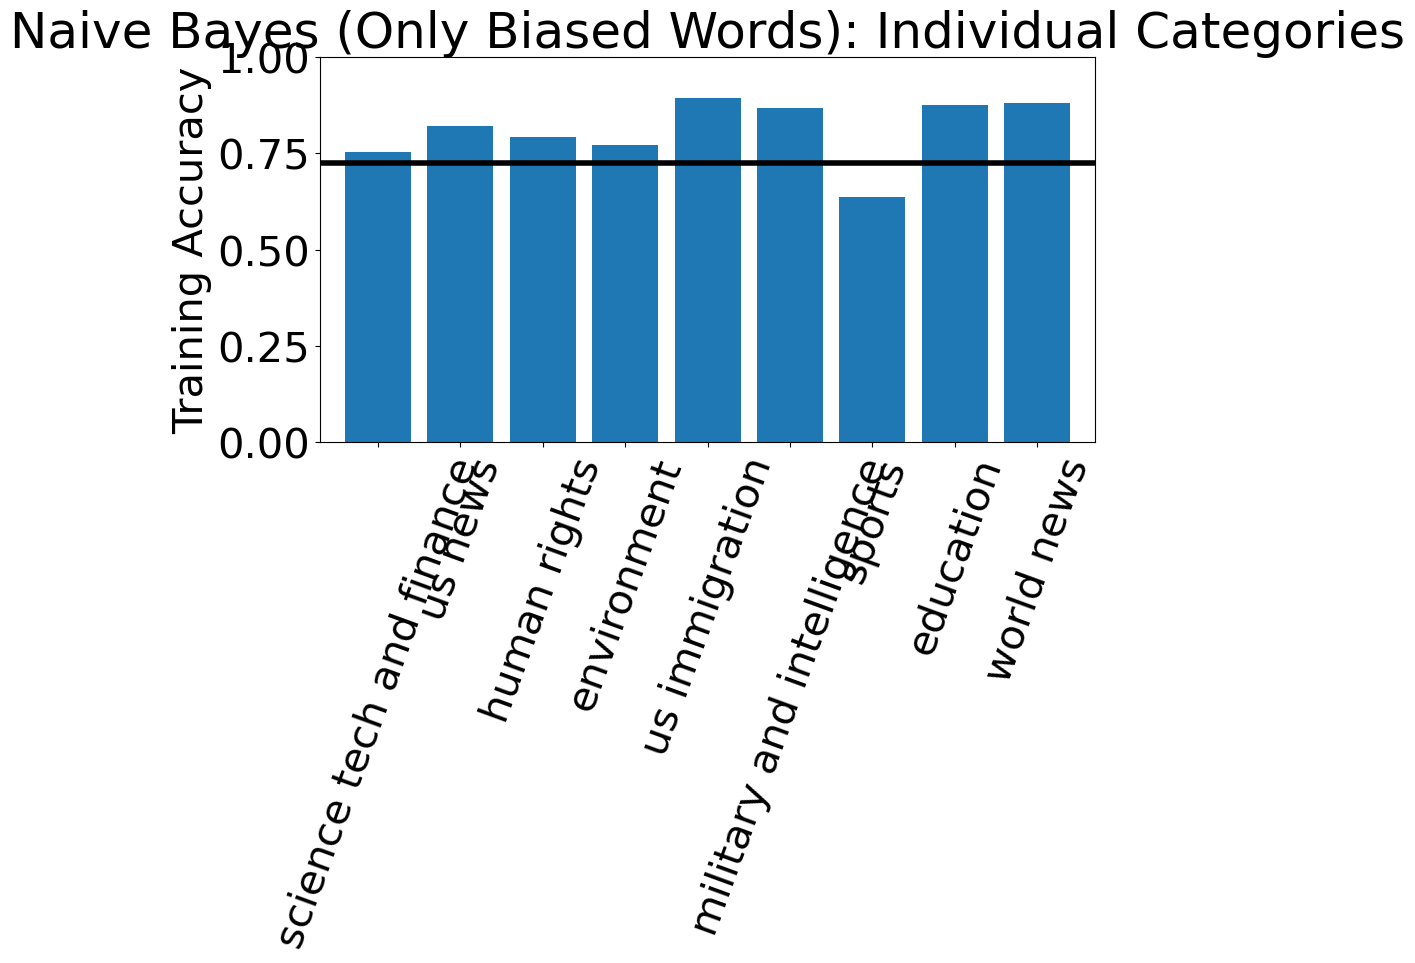

In [ ]:
onlyBias_words_catsInOrder = np.array([])
onlyBias_words_accs = np.array([])

totalPhraseList['PHRASE'] = totalPhraseList['PHRASE'].str.lower()

for cat in cats_in_data.keys():
    cat_subset = labeled_news.loc[labeled_news['label'] == cat]
    biased_words_subset = totalPhraseList.loc[totalPhraseList['CATEGORY_NAME'] == cat]
    vectorizer = CountVectorizer(vocabulary=biased_words_subset['PHRASE'].unique())
    #vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(cat_subset.text)
    vectorizer.vocabulary_
    counts = pd.DataFrame(matrix.toarray(),
                  columns=vectorizer.vocabulary_)
    model_cat = CategoricalNB(alpha=1)
    model_cat.fit(counts, cat_subset['bias'])
    pred_classes = model_cat.predict(counts)
    acc_train = model_cat.score(counts, cat_subset['bias'])
    onlyBias_words_catsInOrder = np.append(onlyBias_words_catsInOrder, cat)
    onlyBias_words_accs = np.append(onlyBias_words_accs, acc_train)

    
fig, ax = plt.subplots(figsize = (10, 5))

#Uncomment to see individual plot
#ax.bar(onlyBias_words_catsInOrder, onlyBias_words_accs)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(70)
#ax.plot([-1, 11], [0.7248, 0.7248], color='black', linewidth=4)
#ax.set_title("Naive Bayes (Only Biased Words): Individual Categories")
#ax.set_ylabel("Training Accuracy")
#ax.set_ylim(0, 1)
#ax.set_xlim(-.7, 8.7)
#
#plt.savefig("naiveBayesIndividualCategories_onlyBiasWords.png")

/var/folders/c5/grwdxjh51tvg9rvf2_st5t1r0000gn/T/ipykernel_4723/2891527691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_subset['text'] = cat_subset['text'].str.replace(w + str(' '), '')
/var/folders/c5/grwdxjh51tvg9rvf2_st5t1r0000gn/T/ipykernel_4723/2891527691.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_subset['text'] = cat_subset['text'].str.replace(str(' ') + w, '')
/var/folders/c5/grwdxjh51tvg9rvf2_st5t1r0000gn/T/ipykernel_4723/2891527691.py:15: SettingWithCopyWarning: 
A value i

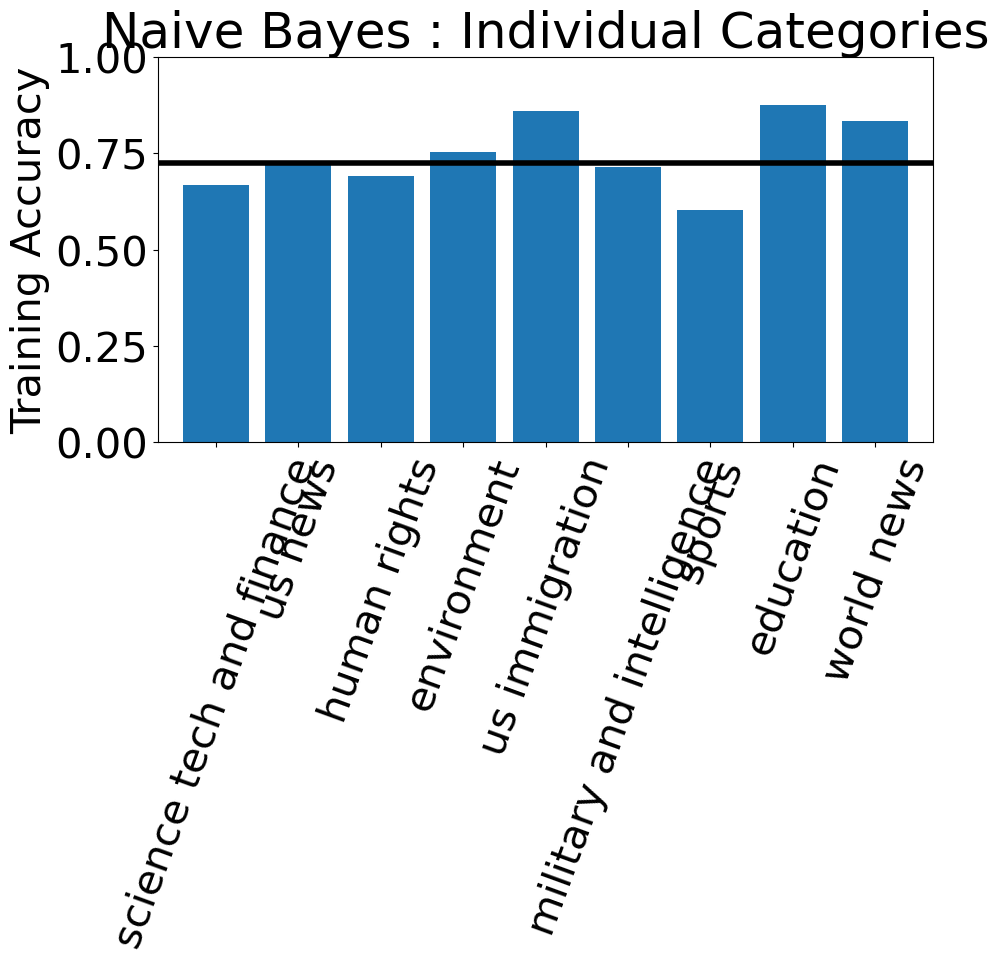

In [ ]:
temp = pd.DataFrame()

onlyUnbias_words_catsInOrder = np.array([])
onlyUnBias_words_accs = np.array([])

totalPhraseList['PHRASE'] = totalPhraseList['PHRASE'].str.lower()

for cat in cats_in_data.keys():
    cat_subset = labeled_news.loc[labeled_news['label'] == cat]
    biased_words_subset = totalPhraseList.loc[totalPhraseList['CATEGORY_NAME'] == cat]
    res = biased_words_subset.PHRASE.str.len().sort_values(ascending=False).index
    uniquePhrases = res
    uniquePhrases = biased_words_subset['PHRASE'].unique()
    for w in uniquePhrases:
       cat_subset['text'] = cat_subset['text'].str.replace(w + str(' '), '') 
       cat_subset['text'] = cat_subset['text'].str.replace(str(' ') + w, '') 
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(cat_subset.text)
    vectorizer.vocabulary_
    counts = pd.DataFrame(matrix.toarray(),
                  columns=vectorizer.vocabulary_)
    model_cat = CategoricalNB(alpha=1)
    model_cat.fit(counts, cat_subset['bias'])
    pred_classes = model_cat.predict(counts)
    acc_train = model_cat.score(counts, cat_subset['bias'])
    onlyUnbias_words_catsInOrder = np.append(onlyUnbias_words_catsInOrder, cat)
    onlyUnBias_words_accs = np.append(onlyUnBias_words_accs, acc_train)

fig, ax = plt.subplots(figsize = (10, 5))


#Uncomment to see individual plot
#ax.bar(onlyUnbias_words_catsInOrder, onlyUnBias_words_accs)
##ax.set_xticklabels(ax.get_xticks(), rotation = 45)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(70)
#ax.plot([-1, 11], [0.7248, 0.7248], color='black', linewidth=4)
#ax.set_title("Naive Bayes : Individual Categories")
#ax.set_ylabel("Training Accuracy")
#ax.set_ylim(0, 1)
#ax.set_xlim(-.7, 8.7)
#
#plt.savefig("naiveBayesIndividualCategories_noBiasWords.png")

In [ ]:
catNames = ['tech & finance', '|\nus news', 'human rights', '|\nenvironment', 'us immigration', '|\nmilitary & intelligence', 'sports', '|\neducation', 'world news']

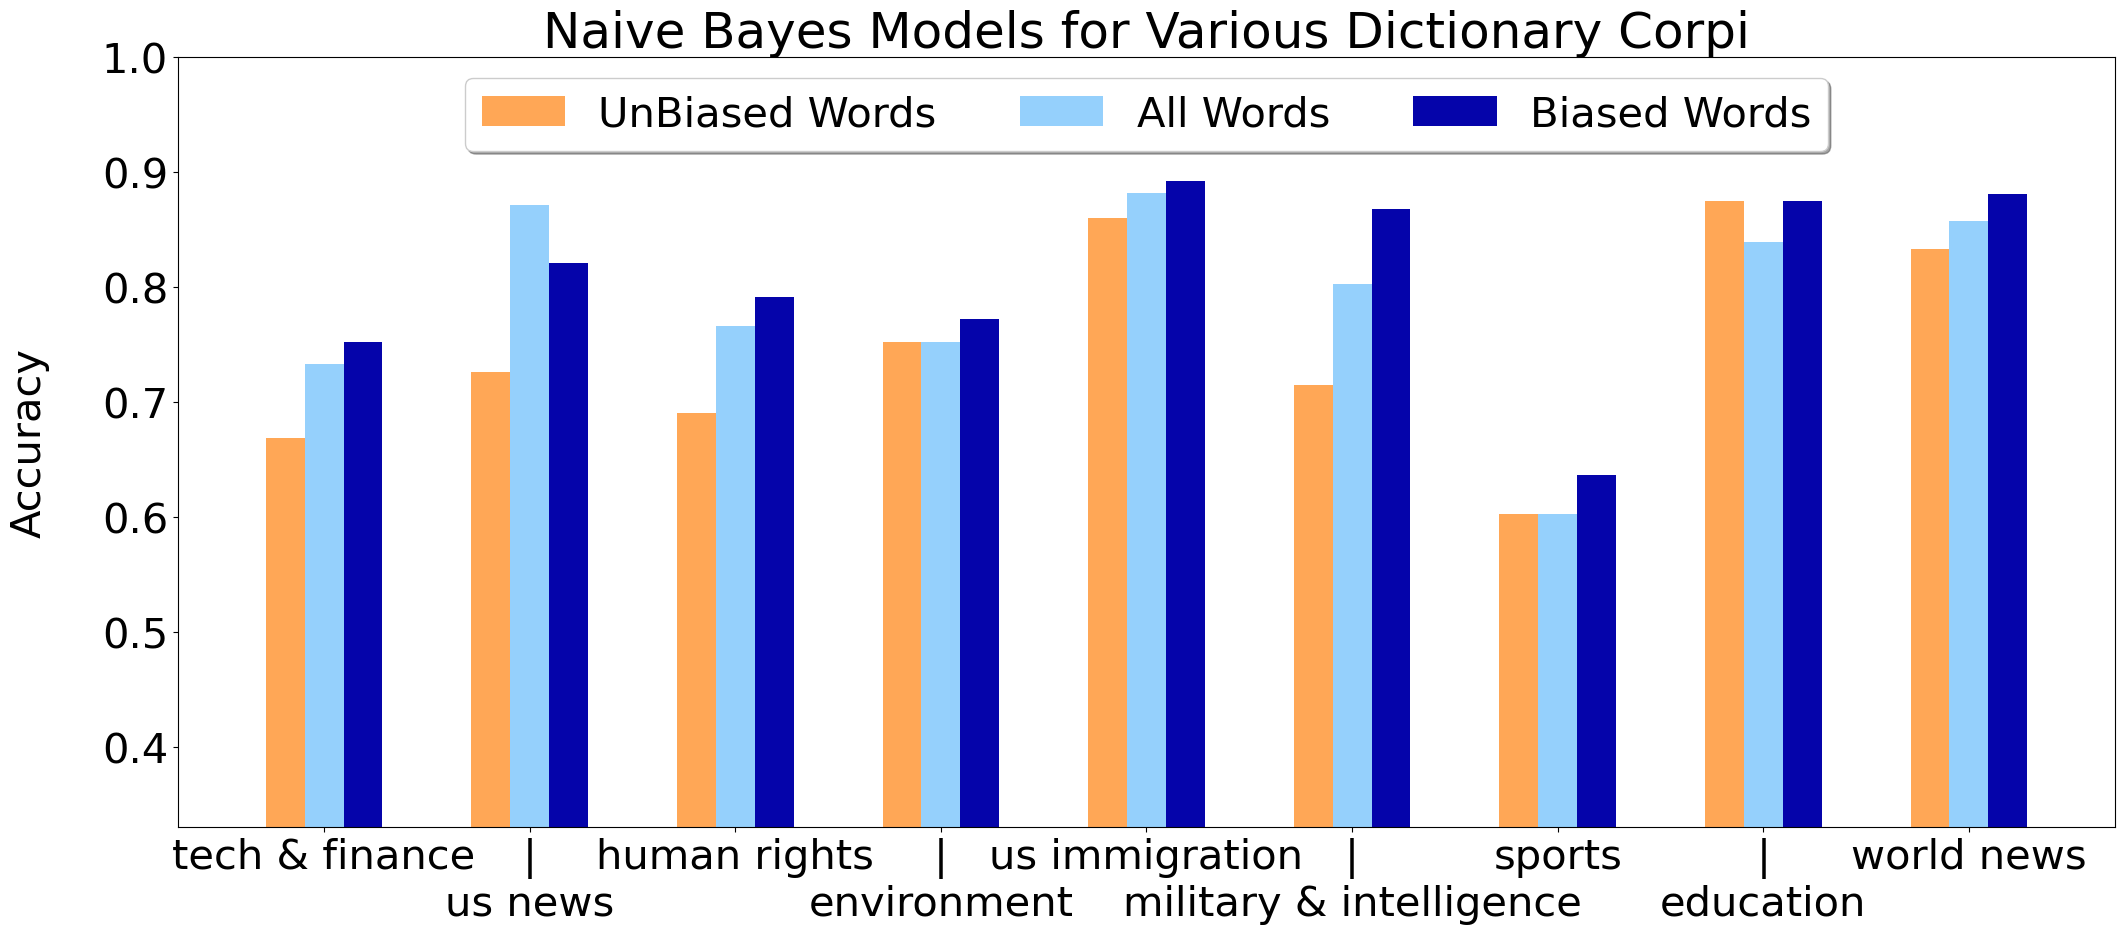

In [ ]:
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (25, 10))

width = 0.27


N = 9
ind = np.arange(2*N, step=2)  # the x locations for the groups
width = 0.27*1.4      # the width of the bars


ax.bar(ind, onlyUnBias_words_accs, width, label='UnBiased Words', color='xkcd:pale orange')
ax.bar(ind+width, all_words_accs, width, label='All Words', color='xkcd:light blue')
ax.bar(ind+width*2, onlyBias_words_accs, width, label='Biased Words', color='xkcd:royal blue')
ax.set_xticks(ind+width)
ax.set_xticklabels(catNames)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=3, fancybox=True, shadow=True)

ax.set_title("Naive Bayes Models for Various Dictionary Corpi")
ax.set_ylabel("Accuracy\n")
ax.set_ylim(0.33, 1)

plt.savefig("naiveBayesIndividualCategories_multiBar.png")